In [1]:
import numpy as np
import os, sys
from glob import glob
from tqdm import tqdm
from time import time
import matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
        'serif'  : ['Palatino'],
        'weight' : 'normal',
        'size'   : 20}
matplotlib.rc('font', **font)
matplotlib.rc('text', usetex=True)
import pandas as pd
import pickle as pkl
import corner

def optimal_n_bins(y,max_bins=100):
    from scipy.stats import iqr
    n_bins = int((max(y) - min(y))/(2*iqr(y)*len(y)**(-1/3)))
    return min(n_bins,max_bins)

def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))  
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()

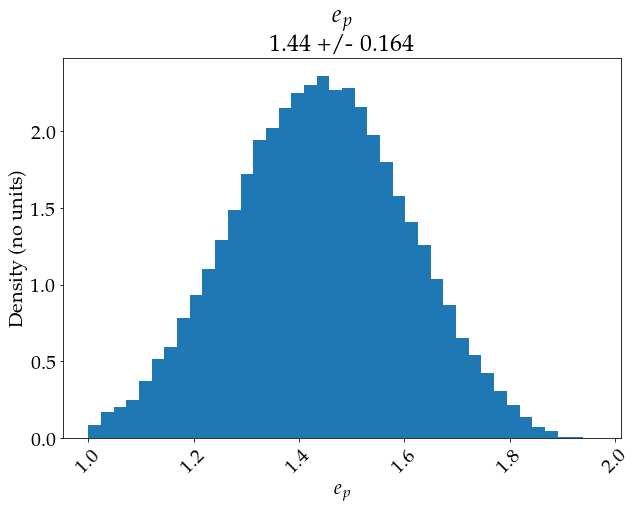

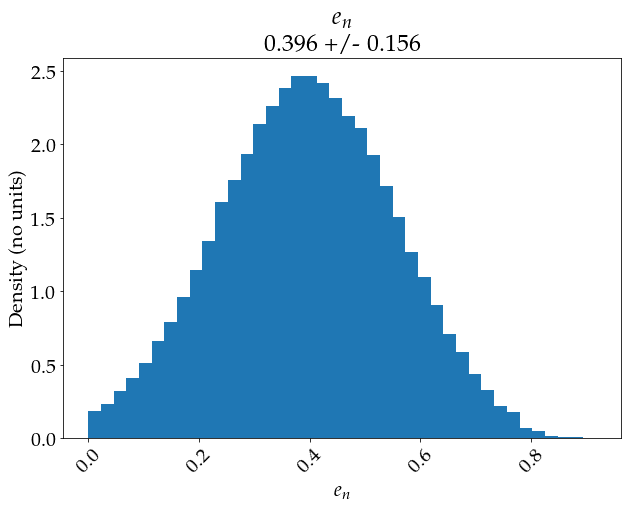

In [2]:
with open('traces/initial/traces_eff_charges.pkl','rb') as fh:
    chain = pkl.load(fh)
    
warmup = 400
ep_trace = chain[:,warmup:,0].flatten()
en_trace = chain[:,warmup:,1].flatten()
make_hist(ep_trace,r'$e_p$',r'$e_p$')
make_hist(en_trace,r'$e_n$',r'$e_n$')

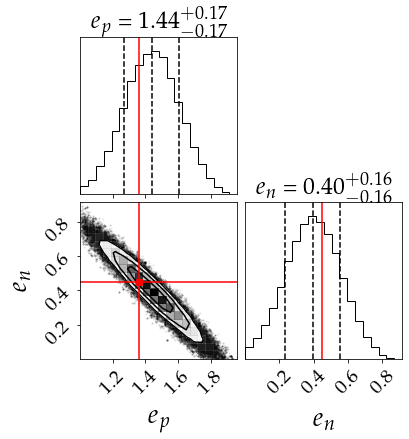

In [3]:
data = np.array([ep_trace,en_trace]).T
f = plt.figure(figsize=(6,6))
figure = corner.corner(data,
                       labels=[r'$e_p$',r'$e_n$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, 
#                        title_kwargs={"fontsize": 16},
                       truths=(1.36,0.45),truth_color='r',
                      fig=f,
                       label_kwargs={'size':26}
                      )

plt.savefig('eff_charges_corner.png',dpi=300)

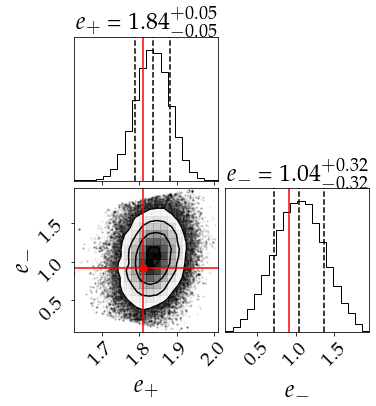

In [12]:
data_iso = np.array([ep_trace + en_trace,ep_trace - en_trace]).T
# f = plt.figure(figsize=(7,7))
figure = corner.corner(data_iso,
                       labels=[r'$e_+$',r'$e_-$'],
                       quantiles=[0.16, 0.5, 0.84],
                       show_titles=True,
                       title_kwargs={"fontsize": 24},
                       truths=(1.36 + 0.45,1.36 - 0.45),truth_color='r',
#                       fig=f,
                       label_kwargs={'size':24},
                       max_n_ticks=4,
                      )

plt.savefig('eff_charges_isospin_corner_v2.png',dpi=300)

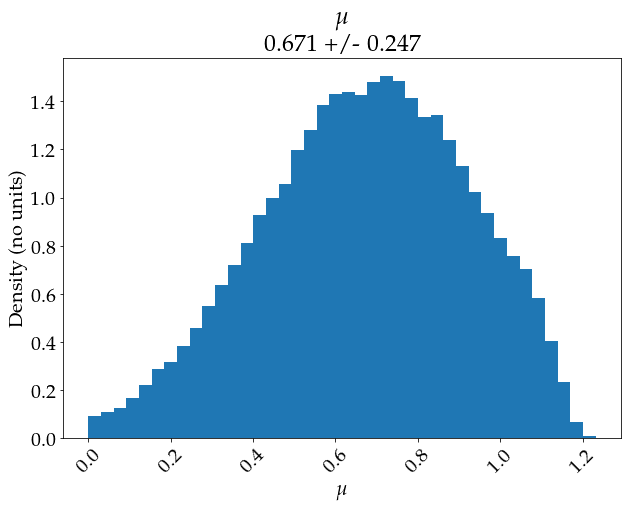

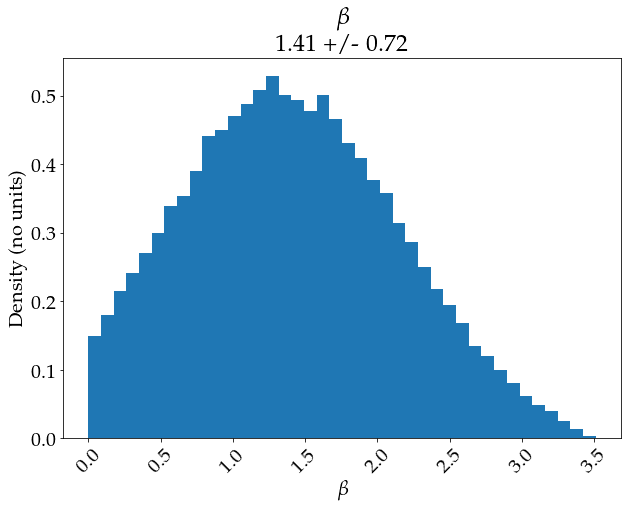

In [13]:
with open('traces/traces_osc_length_params_sigma1.pkl','rb') as fh:
    chain = pkl.load(fh)
    
warmup = 400
mu_trace = chain[:,warmup:,0].flatten()
beta_trace = chain[:,warmup:,1].flatten()

idx = (mu_trace>0.0) & (mu_trace < 1.5)  & (beta_trace>0.0) & (beta_trace < 5.0)
mu_trace = mu_trace[idx]
beta_trace = beta_trace[idx]

make_hist(mu_trace,r'$\mu$',r'$\mu$')
make_hist(beta_trace,r'$\beta$',r'$\beta$')

In [14]:
# with open('traces_osc_length_params_RET1.0.pkl','rb') as fh:
#     chain = pkl.load(fh)
    
# warmup = 400
# mu_trace = chain[:,warmup:,0].flatten()
# beta_trace = chain[:,warmup:,1].flatten()

# # idx = (mu_trace>0.2) & (mu_trace < 1.5)  & (beta_trace>0.0) & (beta_trace < 5.0)
# mu_trace = mu_trace[idx]
# beta_trace = beta_trace[idx]

# make_hist(mu_trace,r'$\mu$',r'$\mu$')
# make_hist(beta_trace,r'$\beta$',r'$\beta$')

In [16]:
# import corner

# data = np.array([mu_trace.flatten(),beta_trace.flatten()]).T

# f = plt.figure(figsize=(10,10))
# figure = corner.corner(data,
#                        labels=[r'$\mu$',r'$\beta$'],
#                        quantiles=[0.16, 0.5, 0.84], bins = 40,
#                        show_titles=True, title_kwargs={"fontsize": 16},
#                       fig=f)

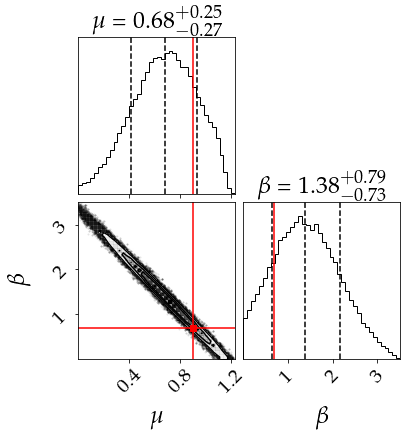

In [17]:
f = plt.figure(figsize=(6,6))
figure = corner.corner(data,
                       labels=[r'$\mu$',r'$\beta$'],
                       quantiles=[0.16, 0.5, 0.84], bins = 40,
                       show_titles=True,
                       title_kwargs={"fontsize": 24},
                       truths=(0.9,0.7),truth_color='r',
                      fig=f,
                       label_kwargs={'size':24},
                       max_n_ticks=4,
                      )

plt.savefig('osc_length_params_corner_v2.png',dpi=300)

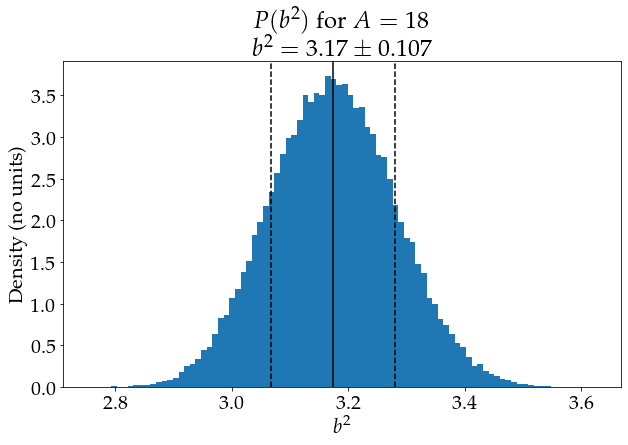

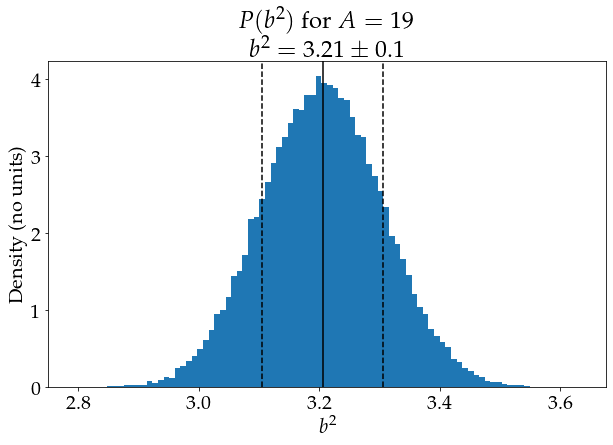

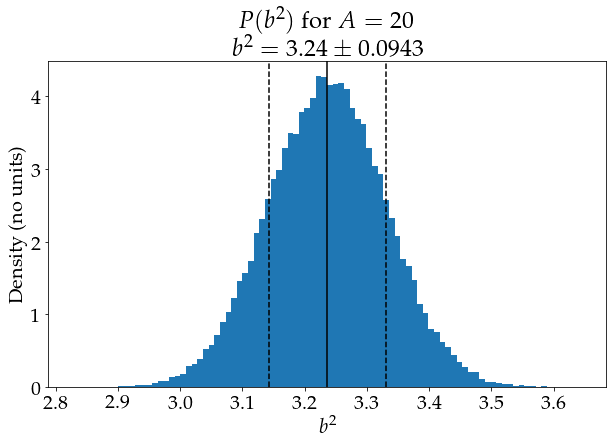

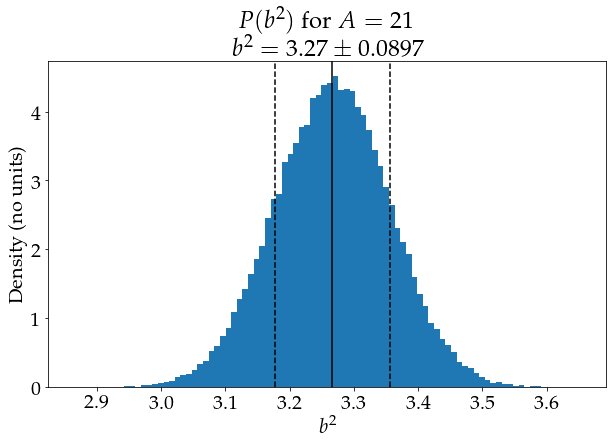

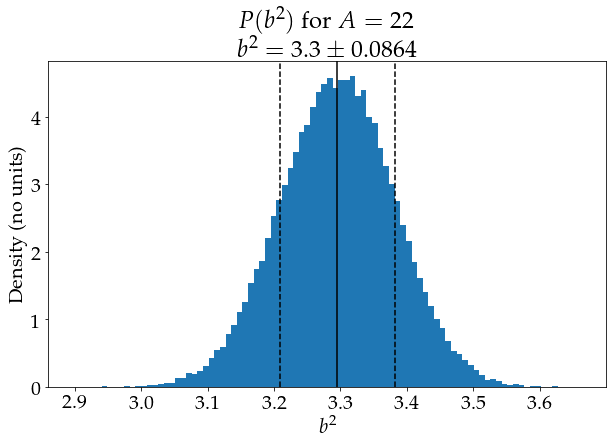

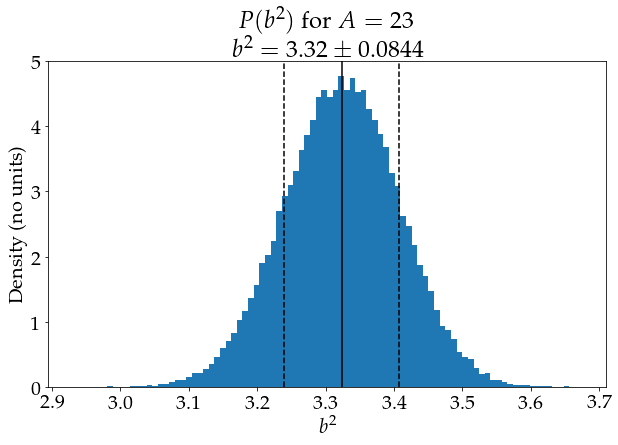

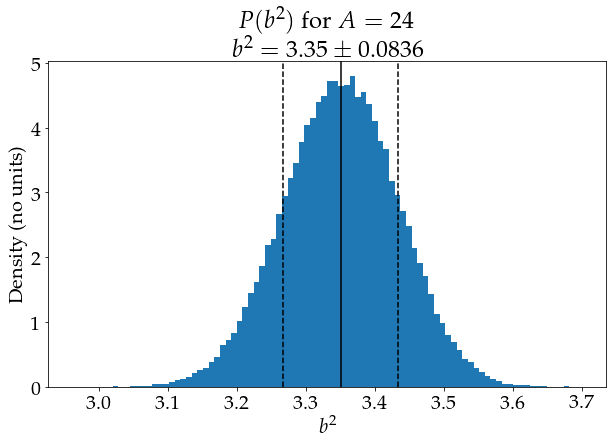

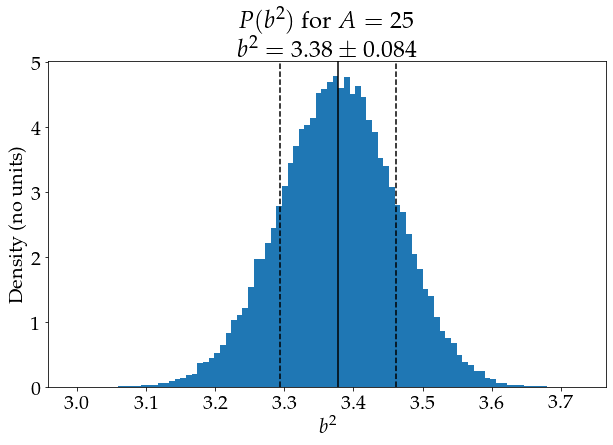

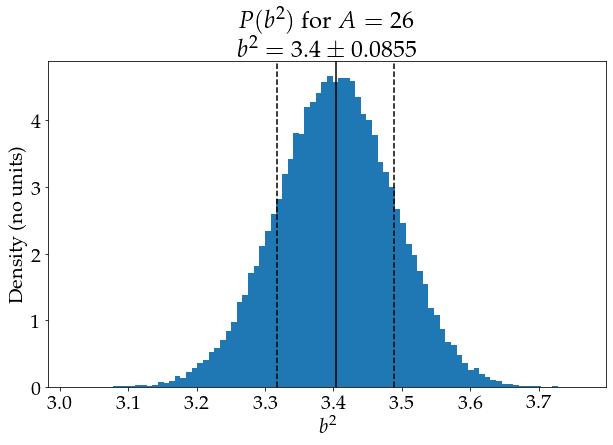

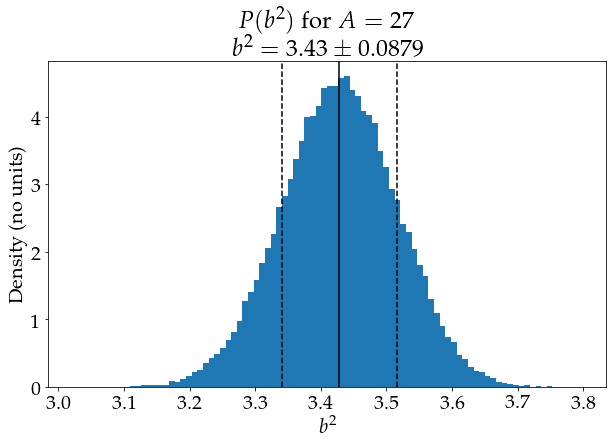

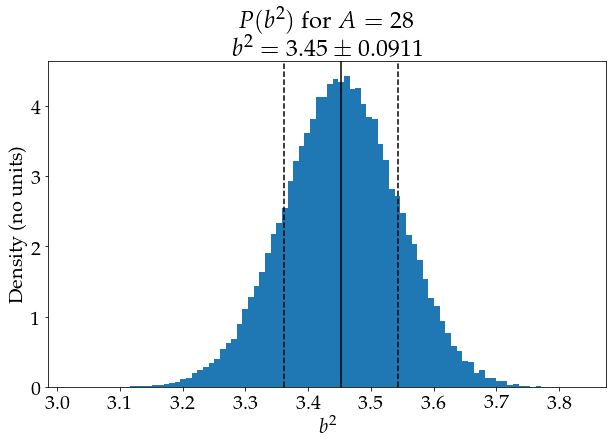

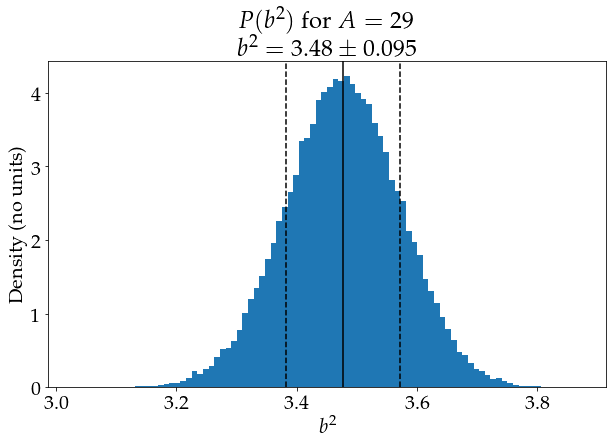

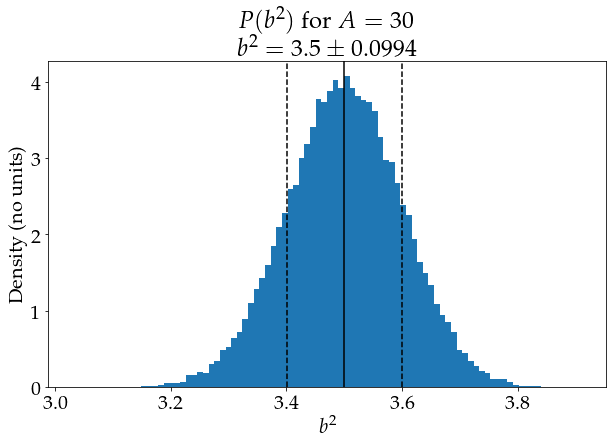

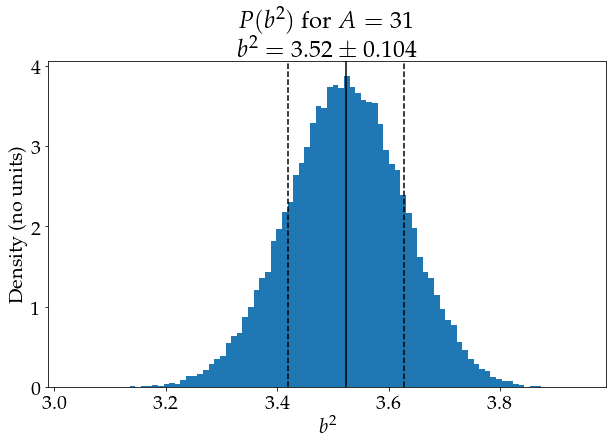

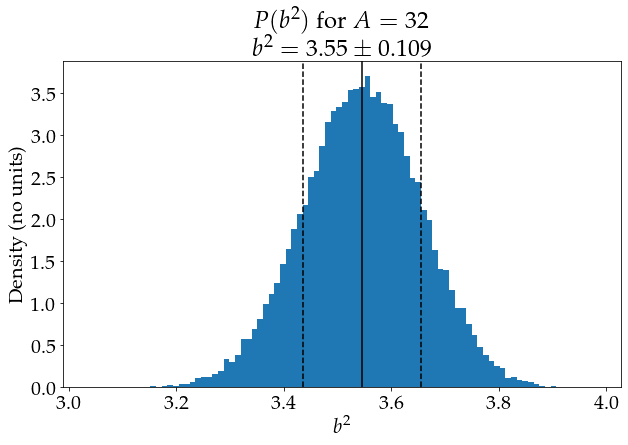

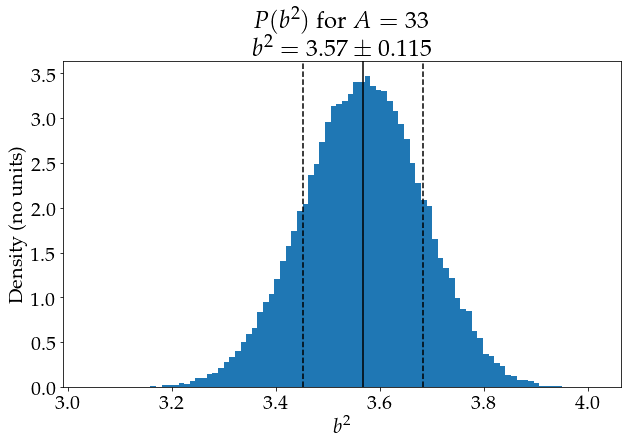

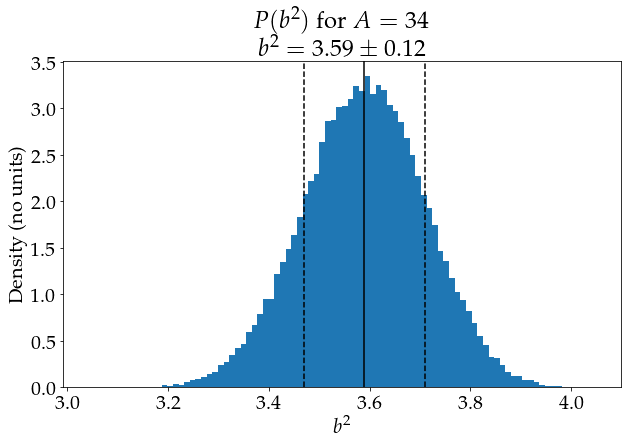

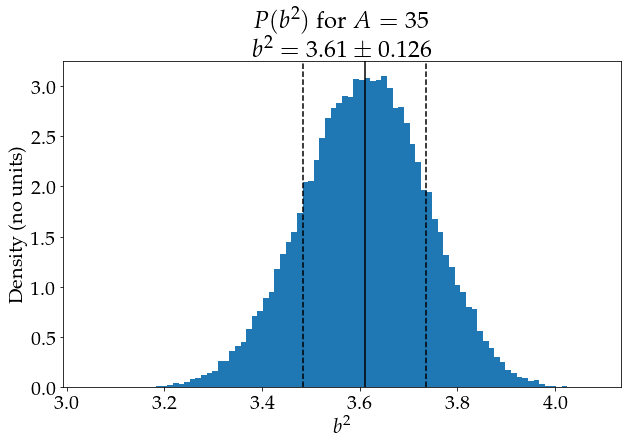

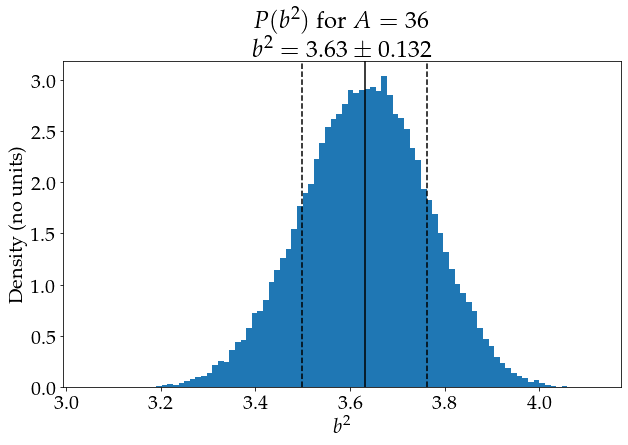

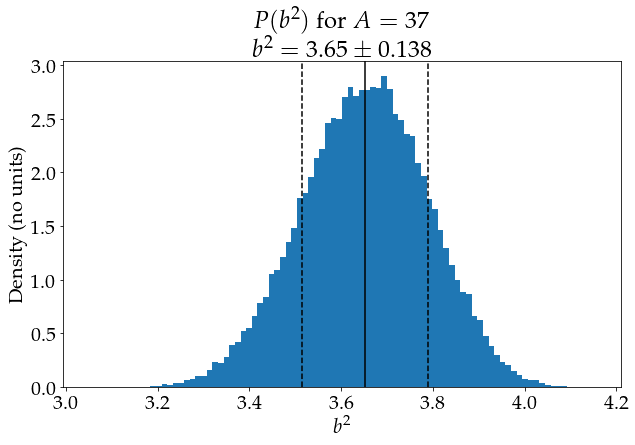

In [17]:
domain = np.arange(18,38)
bsqr_mean_list = []
bsqr_std_list = []
for A in domain:
    plt.figure(figsize=(10,6))
    y = mu_trace*A**(1/3)+beta_trace
    plt.hist(y,bins=optimal_n_bins(mu_trace),density=True)
    plt.xlabel(r'$b^2$')
    plt.ylabel(r'Density (no units)')
    
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.axvline(y_mean,c='k',ls='-')
    plt.axvline(y_mean + y_std,c='k',ls='--')
    plt.axvline(y_mean - y_std,c='k',ls='--')
    
    plt.title(fr"$P(b^2)$ for $A={A}$" + "\n" + fr"$b^2 = {np.mean(y):5.3} \pm {np.std(y):5.3}$")
    plt.show()
    bsqr_mean_list.append(np.mean(y))
    bsqr_std_list.append(np.std(y))

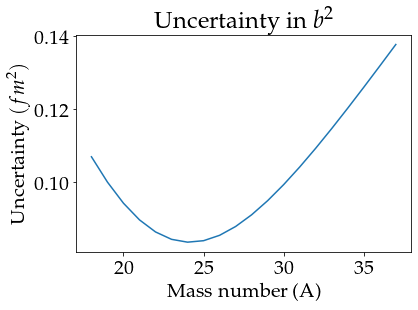

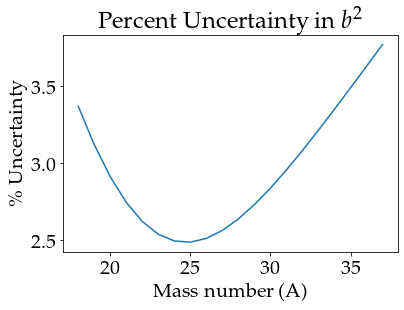

In [18]:
plt.plot(domain,bsqr_std_list)
plt.xlabel('Mass number (A)')
plt.ylabel('Uncertainty $(fm^2)$')
plt.title(r'Uncertainty in $b^2$')
plt.show()

plt.plot(domain,100*np.array(bsqr_std_list)/np.array(bsqr_mean_list))
plt.xlabel('Mass number (A)')
plt.ylabel('\% Uncertainty')
plt.title(r'Percent Uncertainty in $b^2$')
plt.show()

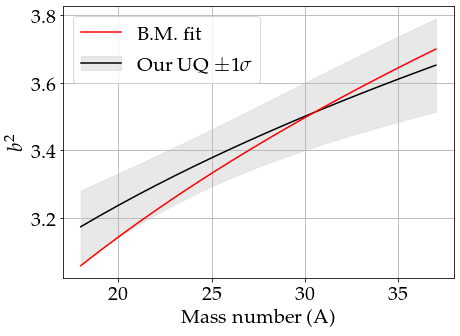

In [71]:
# plt.figure(figsize=(7,5))
# bm_line = plt.plot(domain,0.9*np.array(domain)**(1/3)+0.7,c='red',label='B.M. fit')
# # plt.plot(domain,np.array(bsqr_mean_list) - np.array(bsqr_std_list),ls='--',color='k',lw=0.8)
# # plt.plot(domain,np.array(bsqr_mean_list) + np.array(bsqr_std_list),ls='--',color='k',lw=0.8)
# our_fill = plt.fill_between(domain,np.array(bsqr_mean_list) - np.array(bsqr_std_list),np.array(bsqr_mean_list) + np.array(bsqr_std_list), alpha=0.5, color ='lightgrey')
# our_line = plt.plot(domain,np.array(bsqr_mean_list),c='k')

# plt.grid()
# plt.xlabel('Mass number (A)')
# plt.ylabel(r'$b^2$')
# # plt.title(r'Model of $b^2$ with 1$\sigma$ uncertainty band')
# plt.legend([(our_line,our_fill),bm_line],labels=['Our UQ','B.M. fit'])
# plt.show()

# plt.savefig('osc_length_band_plot.png',dpi=300)

f,ax = plt.subplots(figsize=(7,5))
# plt.plot(domain,np.array(bsqr_mean_list) - np.array(bsqr_std_list),ls='--',color='k',lw=0.8)
# plt.plot(domain,np.array(bsqr_mean_list) + np.array(bsqr_std_list),ls='--',color='k',lw=0.8)

our_line, = ax.plot(domain,np.array(bsqr_mean_list),c='k')
our_fill = ax.fill_between(domain,np.array(bsqr_mean_list) - np.array(bsqr_std_list),np.array(bsqr_mean_list) + np.array(bsqr_std_list), alpha=0.5, color ='lightgrey')

bm_line, = ax.plot(domain,0.9*np.array(domain)**(1/3)+0.7,c='red')
ax.legend([bm_line,(our_fill,our_line)],['B.M. fit',r'Our UQ $\pm 1\sigma$'])
ax.grid()
ax.set_xlabel('Mass number (A)')
ax.set_ylabel(r'$b^2$')
# plt.title(r'Model of $b^2$ with 1$\sigma$ uncertainty band')


f.savefig('osc_length_band_plot.png',dpi=300)
plt.show()
